In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
df = pd.read_csv('Parkinsson disease.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [12]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [14]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

We can observe there are 147 rows with status 1 (Parkinson) and 48 rows for zero (Healthy). Where the healthy data is underrepresented (minority class) and this can make our model biased. So, we are using SMOTE (Synthetic Minority Oversampling Technique) for data augmentation

In [15]:
from imblearn.over_sampling import SMOTE

In [19]:
x=df.drop(['status','name'],axis=1)
y=df['status']
smote = SMOTE(random_state=42)
x_resampled,y_resampled = smote.fit_resample(x,y)
print("Shape of the dataframe before data augmentation:",x.shape)
print("Shape of the dataframe after data augmentation:",x_resampled.shape)

Shape of the dataframe before data augmentation: (195, 22)
Shape of the dataframe after data augmentation: (294, 22)


In [21]:
df=pd.concat([x_resampled,y_resampled],axis=1)
df.shape

(294, 23)

In [22]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [23]:
df['status'].value_counts()

status
1    147
0    147
Name: count, dtype: int64

Now the data is balanced. We can see both the classes have same number of examples for the machine to learn.


In [24]:
df1=df.select_dtypes(include=np.number)
correlation = df1.corr()
print(correlation['status'].sort_values(ascending=False))


status              1.000000
spread1             0.660577
PPE                 0.635133
spread2             0.532955
MDVP:Shimmer        0.484928
MDVP:APQ            0.483659
Shimmer:APQ5        0.468132
MDVP:Shimmer(dB)    0.463494
Shimmer:APQ3        0.459036
Shimmer:DDA         0.459025
MDVP:Jitter(Abs)    0.434579
D2                  0.404671
MDVP:PPQ            0.379451
MDVP:Jitter(%)      0.359702
MDVP:RAP            0.353253
Jitter:DDP          0.353233
RPDE                0.347461
DFA                 0.296653
NHR                 0.240929
MDVP:Fhi(Hz)       -0.183257
MDVP:Flo(Hz)       -0.419821
HNR                -0.424198
MDVP:Fo(Hz)        -0.427653
Name: status, dtype: float64


<Axes: >

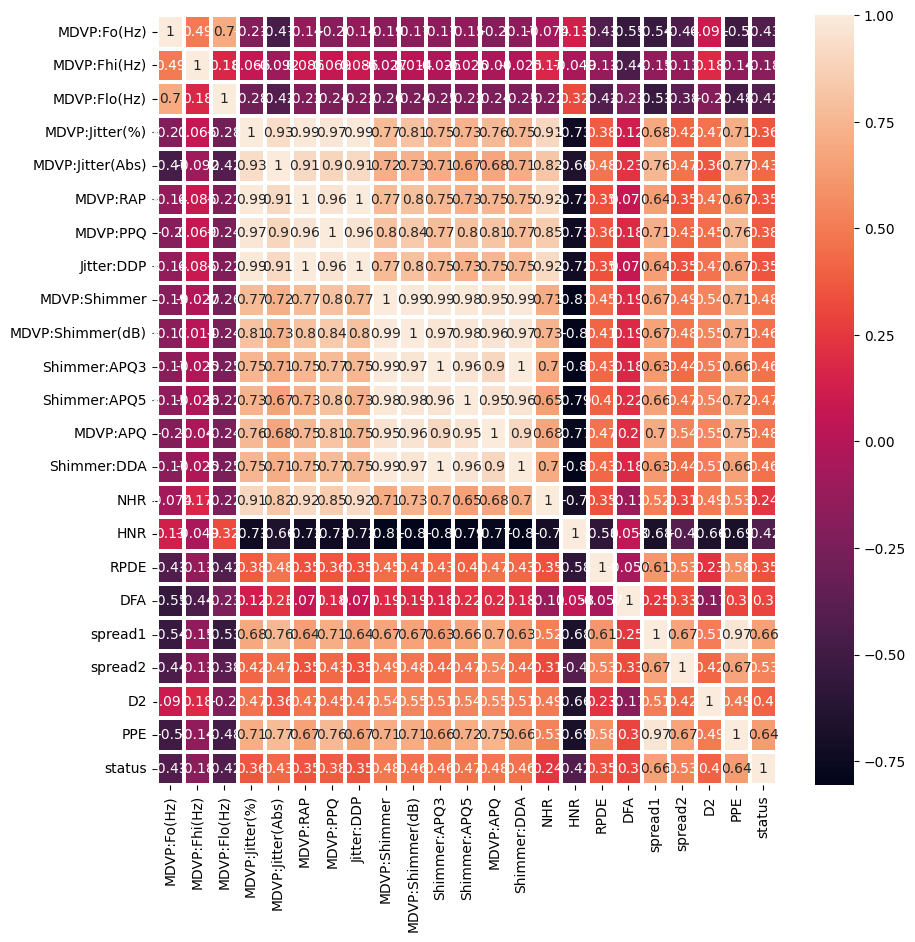

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, annot=True, linewidths=1.5, ax=ax)


Features like spread1, PPE,and spread2 have strong positive correlations with 'status'. These features increase as the status increases, which means they might be good predictors for the model.
Features like HNR, MDVP:Fo(Hz), and MDVP:Fhi(Hz) have strong negative correlations. As these feature values increase, the status tends to decrease, which also suggests they could be significant predictors.

Implementing the PCA for feature selection which shows atleast 95% of the total variance in the dataset, and these selected features are used for the model training

Standardizing the features because giving every number an equal chance to be considered without any unfair advantage.

In [28]:
features = df.drop('status',axis=1)
target = df['status']

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled= pd.DataFrame(features_scaled)
features_scaled.columns = features.columns
features_scaled

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.958318,-0.563022,-1.021263,0.560105,1.053429,0.330789,1.065913,0.329387,1.093462,1.079034,...,0.626004,0.924561,0.038223,-0.410407,-0.682794,1.936798,1.138130,0.761671,-0.018666,1.218163
1,-0.907588,-0.668539,-0.289235,0.993537,1.373750,0.702047,1.660412,0.700637,2.155788,2.253774,...,1.568635,1.995585,-0.042277,-0.866138,-0.242795,2.014099,1.815233,1.623071,0.488993,2.181968
2,-1.028052,-0.882438,-0.331925,1.186696,1.694071,1.010778,2.016274,1.011966,1.611950,1.407961,...,1.043677,1.570998,-0.219264,-0.499775,-0.530203,2.119340,1.477537,1.318724,0.093090,1.768548
3,-1.028178,-0.799995,-0.335489,1.061849,1.694071,0.846643,1.668785,0.845229,1.768281,1.613541,...,1.166482,1.758745,-0.206703,-0.501413,-0.478970,2.008880,1.776407,1.605084,0.266392,2.185421
4,-1.042125,-0.752310,-0.348895,1.737908,2.334712,1.444564,2.547974,1.445742,2.331434,2.007079,...,1.634086,2.395438,-0.088522,-0.734191,-0.656813,2.086419,2.115688,0.363192,0.065494,2.659867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1.635668,0.576360,1.940391,-0.781342,-0.898878,-0.677123,-0.670206,-0.677201,-0.679813,-0.671586,...,-0.678195,-0.640060,-0.459131,0.572061,-0.514631,-1.330236,-0.933862,-1.413535,0.073625,-0.995774
290,-1.085581,-1.052066,-0.661954,-0.479024,-0.227853,-0.474123,-0.425753,-0.472902,-0.706440,-0.686151,...,-0.614037,-0.746679,-0.438586,0.764070,-0.538937,0.503204,-0.095343,-0.312301,-1.200870,-0.171114
291,0.541924,2.565988,-0.989560,0.354248,0.033699,0.239373,0.286367,0.238092,-0.215957,-0.074414,...,-0.334663,-0.171749,1.297622,-0.752514,-0.243302,-1.156384,-0.601964,-0.077929,-0.461120,-0.616307
292,-0.961528,-0.055200,-0.472895,-0.059000,0.336052,-0.188028,0.031616,-0.188116,-0.361556,-0.374287,...,-0.162947,-0.459978,-0.303902,0.023122,1.243116,-0.395724,0.423966,0.205776,-0.446564,0.559913


In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features_scaled)
print(f"Number of components chosen: {pca.n_components_}")

Number of components chosen: 8


In [45]:
print(pd.DataFrame(pca.components_,columns=features_scaled.columns,index=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8']))


      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
PC-1    -0.087246     -0.007481     -0.105838        0.251603   
PC-2     0.515261      0.381826      0.353618        0.084995   
PC-3     0.074893     -0.307195      0.309571       -0.099224   
PC-4    -0.138161     -0.080290      0.036959        0.287537   
PC-5     0.091886      0.376955      0.075064        0.049510   
PC-6    -0.187727      0.303697     -0.695405       -0.048215   
PC-7    -0.071927      0.666386      0.035124       -0.030661   
PC-8    -0.041501     -0.131770     -0.130071        0.059240   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
PC-1          0.243208  0.246614  0.253971    0.246610      0.257377   
PC-2         -0.069974  0.132345  0.078819    0.132313      0.056043   
PC-3         -0.133142 -0.083644 -0.020658   -0.083643      0.221810   
PC-4          0.319849  0.298723  0.245552    0.298810     -0.141672   
PC-5         -0.038332  0.004899  0.106701    0.004877

Implementing Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), Gradient Boosting Machines (GBM), XGBoost, LightGBM, CatBoost algorithms and comparing them

1. Logistic Regression

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
scores = cross_val_score(model_logistic, features_pca, target, cv=5)
print("Accuracy scores for each fold:")
print(scores)
print("Mean Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
accuracy_lr = scores.mean()


Accuracy scores for each fold:
[0.83050847 0.77966102 0.79661017 0.79661017 0.86206897]
Mean Accuracy: 0.81 (+/- 0.06)


2. Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, features_pca, target, cv=10)
print("Accuracy scores for each fold:")
print(scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())
accuracy_rf = scores.mean()

Accuracy scores for each fold:
[0.93333333 0.9        0.86666667 0.93333333 0.96551724 0.86206897
 0.93103448 0.93103448 0.93103448 0.96551724]
Mean Accuracy: 0.9219540229885057
Standard Deviation of Accuracy: 0.03380346232660522


3.K-Nearest Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn,features_pca, target, cv=10)
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())
print("Standard deviation of scores:", scores.std())
accuracy_knn = scores.mean()


Cross-validated scores: [0.86666667 0.9        0.93333333 0.9        1.         0.89655172
 0.86206897 0.89655172 0.93103448 0.89655172]
Average score: 0.9082758620689655
Standard deviation of scores: 0.03738301433628237


4.Gradient Boosting Machines (GBM)

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
scores = cross_val_score(gbm, features_pca, target, cv=10)
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())
print("Standard deviation of scores:", scores.std())
accuracy_gbm = scores.mean()

Cross-validated scores: [0.93333333 0.93333333 0.96666667 0.96666667 1.         0.75862069
 0.93103448 0.86206897 0.89655172 0.96551724]
Average score: 0.9213793103448275
Standard deviation of scores: 0.0657531546147322


5.XGBoost

In [72]:
import xgboost as xgb
from sklearn.model_selection import KFold
xgbclf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3, seed=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(xgbclf, features_pca, target, cv=kf, scoring='accuracy')
print("Cross-validated scores:", scores)
print("Average accuracy:",scores.mean())
print("Standard deviation of scores:", scores.std())
accuracy_xgbclf = scores.mean()

Cross-validated scores: [1.         1.         0.9        0.96666667 0.86206897 0.96551724
 1.         0.89655172 0.79310345 0.96551724]
Average accuracy: 0.9349425287356322
Standard deviation of scores: 0.06610384700591465


6.LightGBM

In [75]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(n_estimators=100, learning_rate=0.05, num_leaves=31)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, features_pca, target, cv=kf, scoring='roc_auc')
print("Cross-validated scores:", scores)
print("Average score:", np.mean(scores))
print("Standard deviation of scores:", np.std(scores))
accuracy_lgbm = scores.mean()

[LightGBM] [Info] Number of positive: 118, number of negative: 117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 235, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502128 -> initscore=0.008511
[LightGBM] [Info] Start training from score 0.008511
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

7.CatBoost

In [77]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [78]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, features_pca, target, cv=kf, scoring='roc_auc')
print("Cross-validated scores:", scores)
print("Average AUC:", scores.mean())
print("Standard deviation of AUC:", scores.std())
accuracy_catboost = scores.mean()

Cross-validated scores: [1.         0.98823529 0.98617512 0.98809524 0.98335315]
Average AUC: 0.989171759686192
Standard deviation of AUC: 0.005694255699235215


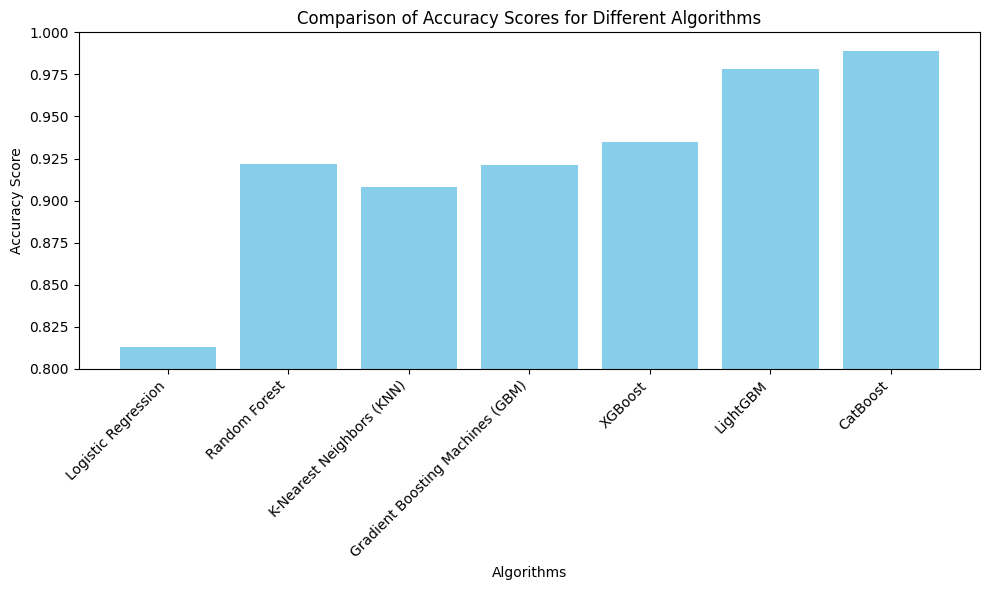

In [79]:
import matplotlib.pyplot as plt
algorithms = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors (KNN)',
              'Gradient Boosting Machines (GBM)', 'XGBoost', 'LightGBM', 'CatBoost']
accuracy_scores = [accuracy_lr, accuracy_rf, accuracy_knn, accuracy_gbm, accuracy_xgbclf, accuracy_lgbm, accuracy_catboost]
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Algorithms')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


After evaluating multiple machine learning algorithms, we can observe catboost and lightgbm outperforms other models.